In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dataset:<br>
https://www.kaggle.com/shree1992/housedata?select=data.csv

In [2]:
df = pd.read_csv('house_pricing_data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.shape

(4600, 18)

In [4]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
df.corrwith(df.price)

price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
yr_renovated    -0.028774
dtype: float64

In [6]:
df1 = df.drop(['sqft_lot','condition','yr_built','yr_renovated','street'],axis=1)
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,1.5,0,0,1340,0,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,2.0,0,4,3370,280,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,1.0,0,0,1930,0,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,1.0,0,0,1000,1000,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,1.0,0,0,1140,800,Redmond,WA 98052,USA


In [7]:
df1.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
city             0
statezip         0
country          0
dtype: int64

In [8]:
df1.city.unique().shape

(44,)

In [9]:
df1.country.unique()

array(['USA'], dtype=object)

In [10]:
df1.statezip.unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [11]:
df1.drop(['date','country','statezip'],axis=1,inplace=True)
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,1.5,0,0,1340,0,Shoreline
1,2384000.0,5.0,2.50,3650,2.0,0,4,3370,280,Seattle
2,342000.0,3.0,2.00,1930,1.0,0,0,1930,0,Kent
3,420000.0,3.0,2.25,2000,1.0,0,0,1000,1000,Bellevue
4,550000.0,4.0,2.50,1940,1.0,0,0,1140,800,Redmond


In [12]:
df1.bedrooms.unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8., 0.])

In [13]:
df1.bedrooms = df1.bedrooms.apply(lambda x: int(x))
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city
0,313000.0,3,1.50,1340,1.5,0,0,1340,0,Shoreline
1,2384000.0,5,2.50,3650,2.0,0,4,3370,280,Seattle
2,342000.0,3,2.00,1930,1.0,0,0,1930,0,Kent
3,420000.0,3,2.25,2000,1.0,0,0,1000,1000,Bellevue
4,550000.0,4,2.50,1940,1.0,0,0,1140,800,Redmond


In [14]:
df1.bathrooms.unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 0.  , 6.75])

In [15]:
df1.waterfront.unique()

array([0, 1], dtype=int64)

In [16]:
df1.view.unique()

array([0, 4, 1, 2, 3], dtype=int64)

In [17]:
df1['total_sqft'] = df1.sqft_above + df1.sqft_basement + df1.sqft_living
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,total_sqft
0,313000.0,3,1.50,1340,1.5,0,0,1340,0,Shoreline,2680
1,2384000.0,5,2.50,3650,2.0,0,4,3370,280,Seattle,7300
2,342000.0,3,2.00,1930,1.0,0,0,1930,0,Kent,3860
3,420000.0,3,2.25,2000,1.0,0,0,1000,1000,Bellevue,4000
4,550000.0,4,2.50,1940,1.0,0,0,1140,800,Redmond,3880


In [18]:
df1.sqft_basement.describe()

count    4600.000000
mean      312.081522
std       464.137228
min         0.000000
25%         0.000000
50%         0.000000
75%       610.000000
max      4820.000000
Name: sqft_basement, dtype: float64

In [19]:
df1['price_sqft'] = df1.price/df1.total_sqft
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,total_sqft,price_sqft
0,313000.0,3,1.50,1340,1.5,0,0,1340,0,Shoreline,2680,116.791045
1,2384000.0,5,2.50,3650,2.0,0,4,3370,280,Seattle,7300,326.575342
2,342000.0,3,2.00,1930,1.0,0,0,1930,0,Kent,3860,88.601036
3,420000.0,3,2.25,2000,1.0,0,0,1000,1000,Bellevue,4000,105.000000
4,550000.0,4,2.50,1940,1.0,0,0,1140,800,Redmond,3880,141.752577


In [20]:
df1['basement'] = df1.sqft_basement.apply(lambda x: 1 if x>0 else 0)
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,total_sqft,price_sqft,basement
0,313000.0,3,1.50,1340,1.5,0,0,1340,0,Shoreline,2680,116.791045,0
1,2384000.0,5,2.50,3650,2.0,0,4,3370,280,Seattle,7300,326.575342,1
2,342000.0,3,2.00,1930,1.0,0,0,1930,0,Kent,3860,88.601036,0
3,420000.0,3,2.25,2000,1.0,0,0,1000,1000,Bellevue,4000,105.000000,1
4,550000.0,4,2.50,1940,1.0,0,0,1140,800,Redmond,3880,141.752577,1


In [21]:
df1.corrwith(df1.price)

price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
floors           0.151461
waterfront       0.135648
view             0.228504
sqft_above       0.367570
sqft_basement    0.210427
total_sqft       0.430410
price_sqft       0.819279
basement         0.110706
dtype: float64

In [22]:
df2 = df1.drop(['sqft_living','sqft_above','sqft_basement'],axis=1)
df2.head()

,price,bedrooms,bathrooms,floors,waterfront,view,city,total_sqft,price_sqft,basement
0,313000.0,3,1.50,1.5,0,0,Shoreline,2680,116.791045,0
1,2384000.0,5,2.50,2.0,0,4,Seattle,7300,326.575342,1
2,342000.0,3,2.00,1.0,0,0,Kent,3860,88.601036,0
3,420000.0,3,2.25,1.0,0,0,Bellevue,4000,105.000000,1
4,550000.0,4,2.50,1.0,0,0,Redmond,3880,141.752577,1


In [23]:
df2.corrwith(df2.price)

price         1.000000
bedrooms      0.200336
bathrooms     0.327110
floors        0.151461
waterfront    0.135648
view          0.228504
total_sqft    0.430410
price_sqft    0.819279
basement      0.110706
dtype: float64

In [24]:
df2.price_sqft.describe()

count     4600.000000
mean       132.938130
std        178.751672
min          0.000000
25%         90.409510
50%        121.926937
75%        157.421809
max      11266.949153
Name: price_sqft, dtype: float64

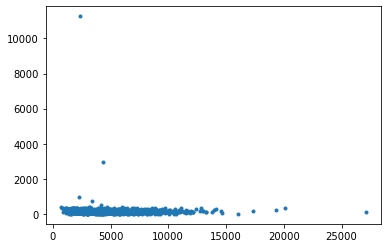

In [25]:
plt.scatter(df2.total_sqft,df2.price_sqft,marker='.')

In [26]:
df2[df2.price_sqft>400]

,price,bedrooms,bathrooms,floors,waterfront,view,city,total_sqft,price_sqft,basement
4346,1.289900e+07,3,2.5,1.0,0,0,Seattle,4380,2944.977169,1
4347,2.110000e+06,4,1.0,1.0,0,0,Tukwila,4200,502.380952,1
4348,2.199900e+06,4,1.5,1.0,0,0,Covington,2240,982.098214,0
4350,2.659000e+07,3,2.0,1.0,0,0,Kent,2360,11266.949153,0
4465,2.560498e+06,3,2.5,2.0,0,0,Seattle,3420,748.683723,1


In [27]:
df3 = df2[(df2.price_sqft>25) & (df2.price_sqft<400) & (df2.total_sqft<10000)]
df3.shape

(4493, 10)

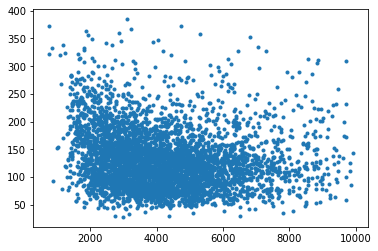

In [28]:
plt.scatter(df3.total_sqft,df3.price_sqft,marker='.')

In [29]:
df3.corrwith(df.price)

price         1.000000
bedrooms      0.317153
bathrooms     0.496870
floors        0.267953
waterfront    0.151629
view          0.357981
total_sqft    0.667545
price_sqft    0.569024
basement      0.168120
dtype: float64

In [30]:
df4 = df3.drop(['waterfront'],axis=1)
df4.head()

,price,bedrooms,bathrooms,floors,view,city,total_sqft,price_sqft,basement
0,313000.0,3,1.50,1.5,0,Shoreline,2680,116.791045,0
1,2384000.0,5,2.50,2.0,4,Seattle,7300,326.575342,1
2,342000.0,3,2.00,1.0,0,Kent,3860,88.601036,0
3,420000.0,3,2.25,1.0,0,Bellevue,4000,105.000000,1
4,550000.0,4,2.50,1.0,0,Redmond,3880,141.752577,1


In [31]:
df4.shape

(4493, 9)

In [32]:
df4.corrwith(df4.price)

price         1.000000
bedrooms      0.317153
bathrooms     0.496870
floors        0.267953
view          0.357981
total_sqft    0.667545
price_sqft    0.569024
basement      0.168120
dtype: float64

In [33]:
dummies = pd.get_dummies(df4.city)
df5 = pd.concat([df4,dummies],axis=1)
df5.head()

,price,bedrooms,bathrooms,floors,view,city,total_sqft,price_sqft,basement,Algona,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,313000.0,3,1.50,1.5,0,Shoreline,2680,116.791045,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5,2.50,2.0,4,Seattle,7300,326.575342,1,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3,2.00,1.0,0,Kent,3860,88.601036,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2.25,1.0,0,Bellevue,4000,105.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2.50,1.0,0,Redmond,3880,141.752577,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X = df5.drop(['price','city','price_sqft'],axis=1)
y = df5.price

In [35]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6409506358748047

In [38]:
las = Lasso(alpha=2,max_iter=3000)
las.fit(X_train,y_train)
las.score(X_test,y_test)

0.6410296669394605

In [39]:
rid = Ridge(alpha=2)
rid.fit(X_train,y_train)
rid.score(X_test,y_test)

0.6522591743600596

In [40]:
np.average(cross_val_score(LinearRegression(),X,y))

0.6877223103297633

In [41]:
np.average(cross_val_score(Lasso(alpha=2,max_iter=5000),X,y))

0.6875483488812852

In [42]:
np.average(cross_val_score(Ridge(alpha=2),X,y))

0.6851706547374683

In [43]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [44]:
import pickle

In [45]:
with open('house_price_predict.pickle','wb') as f:
    pickle.dump(final_model,f)